## ファイルのインポート 

In [1]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd

In [2]:
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import time


## 各ウェブサイトにURLをテーブルから取得

In [3]:
#過去の試合一覧が乗っているHPを取得
url = "https://www.football-lab.jp/nago/match/?year=2019"
res = requests.get(url)

In [4]:
#beautifulsoup(解析対象のHTML/XML, 利用するパーサー)
soup = BeautifulSoup(res.text, "html.parser")


In [5]:
#home のみ取り出す
home_aways = soup.find_all('span', class_='home')
home_url=[]
for i in home_aways:
#    home_away = soup.find('span', class_='away') #awayを見つけ出す
    Parent = i.parent.parent #親をたどる
    elems = Parent.find('a').next_element.next_element.next_element.find('a')['href'] #子要素を取り出す。
    home_url.append(elems)
home_url

['/nago/report/?year=2019&month=03&date=02',
 '/nago/report/?year=2019&month=03&date=30',
 '/nago/report/?year=2019&month=04&date=20',
 '/nago/report/?year=2019&month=04&date=28',
 '/nago/report/?year=2019&month=05&date=12',
 '/nago/report/?year=2019&month=05&date=26',
 '/nago/report/?year=2019&month=06&date=22',
 '/nago/report/?year=2019&month=07&date=07',
 '/nago/report/?year=2019&month=07&date=20',
 '/nago/report/?year=2019&month=08&date=10',
 '/nago/report/?year=2019&month=08&date=24',
 '/nago/report/?year=2019&month=08&date=30',
 '/nago/report/?year=2019&month=10&date=05',
 '/nago/report/?year=2019&month=10&date=19',
 '/nago/report/?year=2019&month=11&date=09',
 '/nago/report/?year=2019&month=11&date=23',
 '/nago/report/?year=2019&month=12&date=07']

In [6]:
#リスト型にする
# pickup_links=[elem.attrs["href"] for elem in elems]
home_url=['https://www.football-lab.jp'+home_url[i] for i in range(len(home_url))]
home_url


['https://www.football-lab.jp/nago/report/?year=2019&month=03&date=02',
 'https://www.football-lab.jp/nago/report/?year=2019&month=03&date=30',
 'https://www.football-lab.jp/nago/report/?year=2019&month=04&date=20',
 'https://www.football-lab.jp/nago/report/?year=2019&month=04&date=28',
 'https://www.football-lab.jp/nago/report/?year=2019&month=05&date=12',
 'https://www.football-lab.jp/nago/report/?year=2019&month=05&date=26',
 'https://www.football-lab.jp/nago/report/?year=2019&month=06&date=22',
 'https://www.football-lab.jp/nago/report/?year=2019&month=07&date=07',
 'https://www.football-lab.jp/nago/report/?year=2019&month=07&date=20',
 'https://www.football-lab.jp/nago/report/?year=2019&month=08&date=10',
 'https://www.football-lab.jp/nago/report/?year=2019&month=08&date=24',
 'https://www.football-lab.jp/nago/report/?year=2019&month=08&date=30',
 'https://www.football-lab.jp/nago/report/?year=2019&month=10&date=05',
 'https://www.football-lab.jp/nago/report/?year=2019&month=10&da

## `ウェブサイト立ち上げ

In [7]:
# ブラウザ起動
PATH = "C:\Program Files (x86)\chromedriver.exe"
# options = Options()
#options.add_argument("--incognito") # プライベートブラウズモードで開く

driver = webdriver.Chrome(executable_path = PATH)

# windows size設定(80%表示で最適な window size)
driver.set_window_size(840,1000)
#Webドライバーのタイムアウト時間を10秒に設定
wait = WebDriverWait(driver, 10)

## テーブル取得

In [8]:
def get_table(urls):
    dfs=[]
    for url in urls: #一旦３つくらい
        driver.get(url)
    # CLASS名指定したページ上の要素が読み込まれるまで待機（15秒でタイムアウト判定）
        WebDriverWait(driver, 15).until(EC.presence_of_element_located((By.CLASS_NAME, 'statsTbl6 ')))
        elem_table = driver.find_element_by_xpath("/html/body/article/div[10]/table[2]")
        time.sleep(3)
        html = elem_table.get_attribute('outerHTML')
        df = pd.read_html(html) #ここではリスト

        #対戦チームの
        elem_home = driver.find_element_by_css_selector('#nago > article > div:nth-child(10) > div:nth-child(6) > em:nth-child(1)')
        elem_home_team = driver.find_element_by_css_selector('#nago > article > div:nth-child(10) > div:nth-child(6) > em:nth-child(2) > span.dsktp')
        elem_away = driver.find_element_by_css_selector('#nago > article > div:nth-child(10) > div:nth-child(6) > em:nth-child(4)')
        elem_away_team = driver.find_element_by_css_selector('#nago > article > div:nth-child(10) > div:nth-child(6) > em:nth-child(5) > span.dsktp')

        dfs.append([df,elem_home.text,elem_home_team.text,elem_away.text,elem_away_team.text])
    return dfs
    # teams_home_away.append([elem_home.text,elem_home_team.text,elem_away.text,elem_away_team.text])

In [9]:
home_dfs = get_table(home_url)
len(home_dfs)

17

In [10]:
home_dfs[0][0][0]

,今季平均,成功率,総数,Unnamed: 3,総数.1,成功率.1,今季平均.1
0,ゴール期待値,ゴール期待値,ゴール期待値,ゴール期待値,NaN,NaN,NaN
1,1.583,-,1.17,ゴール期待値,0.423,-,1.507
2,シュート,シュート,シュート,シュート,NaN,NaN,NaN
3,14.2,(13.3%),15,シュート,4,(0.0%),13.300
4,枠内シュート,枠内シュート,枠内シュート,枠内シュート,NaN,NaN,NaN
5,4.5,-,4,枠内シュート,2,-,4.600
6,PKによるシュート,PKによるシュート,PKによるシュート,PKによるシュート,NaN,NaN,NaN
7,0.0,-,0,PKによるシュート,0,-,0.000
8,パス,パス,パス,パス,NaN,NaN,NaN
9,609.0,(87.7%),651,パス,403,(81.9%),480.000


In [11]:
def change_column_name(dfs):
    #列名をそれぞれ変える
    change_dfs=[]
    for i in range(len(dfs)):
        stats_df = pd.DataFrame(dfs[i][0][0])
            # カラム名変更
        columns_name = [dfs[i][1]+"_"+dfs[i][2]+"_2019平均",
                            dfs[i][1]+"_"+dfs[i][2]+"_成功率",
                            dfs[i][1]+"_"+dfs[i][2]+"_総数",
                            "スタッツ",
                            dfs[i][3]+"_"+dfs[i][4]+"_総数",
                            dfs[i][3]+"_"+dfs[i][4]+"_成功率",
                            dfs[i][3]+"_"+dfs[i][4]+"_2019平均"]
        stats_df.columns = columns_name
        change_dfs.append(stats_df)
        # stats_df.dropna(axis = 0, how = 'any', inplace=True) #一つでもNanが行に含まれてたら削除
        # stats_df.set_index("スタッツ", inplace=True, drop=True) #Dropでsetindexの列を残さない
    return change_dfs

In [12]:
home_dfs = change_column_name(home_dfs)

In [13]:

len(home_dfs)

17

In [14]:
def organize_df(dfs):
    organize_df1=[]
    for i in range(len(dfs)):
        # stats_df = pd.DataFrame(dfs[i][0][0])

        #データフレームを整理する
        dfs[i].dropna(axis = 0, how = 'any', inplace=True) #一つでもNanが行に含まれてたら削除
        dfs[i].set_index("スタッツ", inplace=True, drop=True) #Dropでsetindexの列を残さない

        #置換
        dfs[i].iloc[:,2] = dfs[i].iloc[:,2].str.replace("m", "")
        dfs[i].iloc[:,2] = dfs[i].iloc[:,2].str.replace("%", "")
        dfs[i].iloc[:,2] = dfs[i].iloc[:,2].str.replace(",", "")
        dfs[i].iloc[:,3] = dfs[i].iloc[:,3].str.replace("m", "")
        dfs[i].iloc[:,3] = dfs[i].iloc[:,3].str.replace("%", "")
        dfs[i].iloc[:,3] = dfs[i].iloc[:,3].str.replace(",", "")
        dfs[i].iloc[:,1] = dfs[i].iloc[:,1].str.replace("%", "")
        dfs[i].iloc[:,1] = dfs[i].iloc[:,1].str.replace(")", "")
        dfs[i].iloc[:,1] = dfs[i].iloc[:,1].str.replace("(", "")
        dfs[i].iloc[:,1] = dfs[i].iloc[:,1].str.replace("-", "0")
        dfs[i].iloc[:,4] = dfs[i].iloc[:,4].str.replace("%", "")
        dfs[i].iloc[:,4] = dfs[i].iloc[:,4].str.replace(")", "")
        dfs[i].iloc[:,4] = dfs[i].iloc[:,4].str.replace("(", "")
        dfs[i].iloc[:,4] = dfs[i].iloc[:,4].str.replace("-", "0")
        
                #float型にする
        dfs[i].iloc[:,0] = dfs[i].iloc[:,0].astype(float)
        dfs[i].iloc[:,1] = dfs[i].iloc[:,1].astype(float)
        dfs[i].iloc[:,2] = dfs[i].iloc[:,2].astype(float)
        dfs[i].iloc[:,3] = dfs[i].iloc[:,3].astype(float)
        dfs[i].iloc[:,4] = dfs[i].iloc[:,4].astype(float)
        dfs[i].iloc[:,5] = dfs[i].iloc[:,5].astype(float)


        organize_df1.append(dfs[i])

    # return organize_df

In [15]:
organize_df(home_dfs)

In [16]:
home_dfs[16]

,HOME_名古屋グランパス_2019平均,HOME_名古屋グランパス_成功率,HOME_名古屋グランパス_総数,AWAY_鹿島アントラーズ_総数,AWAY_鹿島アントラーズ_成功率,AWAY_鹿島アントラーズ_2019平均
スタッツ,,,,,,
ゴール期待値,1.583,0.0,1.091,1.594,0.0,1.485
シュート,14.200,0.0,8.000,10.000,0.0,12.400
枠内シュート,4.500,0.0,1.000,2.000,0.0,4.300
PKによるシュート,0.000,0.0,0.000,0.000,0.0,0.100
パス,609.000,85.4,680.000,430.000,79.5,438.200
クロス,14.800,14.3,14.000,15.000,33.3,14.400
直接ＦＫ,13.600,0.0,13.000,11.000,0.0,12.600
間接ＦＫ,2.600,0.0,2.000,2.000,0.0,1.900
ＣＫ,5.600,0.0,4.000,4.000,0.0,4.800


## awaygameのデータ取得

In [17]:
#home のみ取り出す
home_aways = soup.find_all('span', class_='away')
away_url=[]
for i in home_aways:
#    home_away = soup.find('span', class_='away') #awayを見つけ出す
    Parent = i.parent.parent #親をたどる
    elems = Parent.find('a').next_element.next_element.next_element.find('a')['href'] #子要素を取り出す。
    away_url.append(elems)
home_url
#リスト型にする
# pickup_links=[elem.attrs["href"] for elem in elems]
away_url=['https://www.football-lab.jp'+away_url[i] for i in range(len(away_url))]
away_url


['https://www.football-lab.jp/nago/report/?year=2019&month=02&date=23',
 'https://www.football-lab.jp/nago/report/?year=2019&month=03&date=09',
 'https://www.football-lab.jp/nago/report/?year=2019&month=03&date=17',
 'https://www.football-lab.jp/nago/report/?year=2019&month=04&date=05',
 'https://www.football-lab.jp/nago/report/?year=2019&month=04&date=13',
 'https://www.football-lab.jp/nago/report/?year=2019&month=05&date=04',
 'https://www.football-lab.jp/nago/report/?year=2019&month=05&date=17',
 'https://www.football-lab.jp/nago/report/?year=2019&month=06&date=01',
 'https://www.football-lab.jp/nago/report/?year=2019&month=06&date=15',
 'https://www.football-lab.jp/nago/report/?year=2019&month=06&date=30',
 'https://www.football-lab.jp/nago/report/?year=2019&month=07&date=13',
 'https://www.football-lab.jp/nago/report/?year=2019&month=08&date=04',
 'https://www.football-lab.jp/nago/report/?year=2019&month=08&date=18',
 'https://www.football-lab.jp/nago/report/?year=2019&month=09&da

In [18]:
away_dfs = get_table(away_url)

In [19]:
away_dfs = change_column_name(away_dfs)

In [20]:
organize_df(away_dfs)

In [21]:
away_dfs[1]

,HOME_ガンバ大阪_2019平均,HOME_ガンバ大阪_成功率,HOME_ガンバ大阪_総数,AWAY_名古屋グランパス_総数,AWAY_名古屋グランパス_成功率,AWAY_名古屋グランパス_2019平均
スタッツ,,,,,,
ゴール期待値,1.433,0.0,1.576,1.462,0.0,1.583
シュート,14.600,10.0,10.000,17.000,11.8,14.200
枠内シュート,4.900,0.0,6.000,9.000,0.0,4.500
PKによるシュート,0.100,0.0,1.000,0.000,0.0,0.000
パス,587.000,76.8,479.000,514.000,78.2,609.000
クロス,15.100,12.5,8.000,8.000,37.5,14.800
直接ＦＫ,11.000,0.0,15.000,16.000,0.0,13.600
間接ＦＫ,1.400,0.0,1.000,7.000,0.0,2.600
ＣＫ,5.500,0.0,3.000,7.000,0.0,5.600


In [ ]:
# dfs[1]

NameError: name 'dfs' is not defined

In [23]:
#スタジアム毎のurlを取得する できた
mizuho_url=[]
toyota_url=[]
for tr in soup.select('table.statsTbl10 tbody tr'):
    tds = tr.select('td')
    if tds[6].text=="豊田ス":
        toyota_url.append(tds[4].find("a")['href'] )

    elif tds[6].text=="パロ瑞穂":
        mizuho_url.append(tds[4].find("a")['href'] )

toyota_url=['https://www.football-lab.jp'+toyota_url[i] for i in range(len(toyota_url))]
mizuho_url=['https://www.football-lab.jp'+mizuho_url[i] for i in range(len(mizuho_url))]

In [24]:
# toyota_dfs = get_table(toyota_url)
mizuho_dfs = get_table(mizuho_url)

In [25]:
mizuho_dfs

[[[          今季平均         成功率          総数  Unnamed: 3      総数.1    成功率.1  \
   0       ゴール期待値      ゴール期待値      ゴール期待値      ゴール期待値       NaN      NaN   
   1        1.583           -        1.17      ゴール期待値     0.423        -   
   2         シュート        シュート        シュート        シュート       NaN      NaN   
   3         14.2     (13.3%)          15        シュート         4   (0.0%)   
   4       枠内シュート      枠内シュート      枠内シュート      枠内シュート       NaN      NaN   
   5          4.5           -           4      枠内シュート         2        -   
   6    PKによるシュート   PKによるシュート   PKによるシュート   PKによるシュート       NaN      NaN   
   7          0.0           -           0   PKによるシュート         0        -   
   8           パス          パス          パス          パス       NaN      NaN   
   9        609.0     (87.7%)         651          パス       403  (81.9%)   
   10         クロス         クロス         クロス         クロス       NaN      NaN   
   11        14.8     (11.8%)          17         クロス         6  (16.7%)   
   12       

In [26]:
# toyota_dfs = change_column_name(toyota_dfs)
mizuho_dfs = change_column_name(mizuho_dfs)

In [27]:
mizuho_dfs[1]

,HOME_名古屋グランパス_2019平均,HOME_名古屋グランパス_成功率,HOME_名古屋グランパス_総数,スタッツ,AWAY_清水エスパルス_総数,AWAY_清水エスパルス_成功率,AWAY_清水エスパルス_2019平均
0,ゴール期待値,ゴール期待値,ゴール期待値,ゴール期待値,NaN,NaN,NaN
1,1.583,-,1.304,ゴール期待値,1.434,-,1.313
2,シュート,シュート,シュート,シュート,NaN,NaN,NaN
3,14.2,(8.3%),12,シュート,12,(16.7%),12.600
4,枠内シュート,枠内シュート,枠内シュート,枠内シュート,NaN,NaN,NaN
5,4.5,-,3,枠内シュート,6,-,4.200
6,PKによるシュート,PKによるシュート,PKによるシュート,PKによるシュート,NaN,NaN,NaN
7,0.0,-,0,PKによるシュート,0,-,0.100
8,パス,パス,パス,パス,NaN,NaN,NaN
9,609.0,(81.9%),728,パス,264,(61.0%),393.300


In [28]:
# toyota_dfs = organize_df(toyota_dfs)
organize_df(mizuho_dfs)

In [29]:
mizuho_dfs[1]

,HOME_名古屋グランパス_2019平均,HOME_名古屋グランパス_成功率,HOME_名古屋グランパス_総数,AWAY_清水エスパルス_総数,AWAY_清水エスパルス_成功率,AWAY_清水エスパルス_2019平均
スタッツ,,,,,,
ゴール期待値,1.583,0.0,1.304,1.434,0.0,1.313
シュート,14.200,8.3,12.000,12.000,16.7,12.600
枠内シュート,4.500,0.0,3.000,6.000,0.0,4.200
PKによるシュート,0.000,0.0,0.000,0.000,0.0,0.100
パス,609.000,81.9,728.000,264.000,61.0,393.300
クロス,14.800,15.0,20.000,6.000,83.3,13.500
直接ＦＫ,13.600,0.0,16.000,15.000,0.0,11.100
間接ＦＫ,2.600,0.0,4.000,0.000,0.0,1.600
ＣＫ,5.600,0.0,3.000,3.000,0.0,4.200


## 総数のみを抽出してまとめる

In [30]:
def chose_df(dfs):
    concat_df=[]
    for i in range(len(dfs)):
        concat_df.append(dfs[i]["HOME_名古屋グランパス_総数"])
    concat_df = pd.DataFrame(concat_df)
    return concat_df

In [31]:
m=chose_df(mizuho_dfs)
m

スタッツ,ゴール期待値,シュート,枠内シュート,PKによるシュート,パス,クロス,直接ＦＫ,間接ＦＫ,ＣＫ,スローイン,...,オフサイド,警告,退場,３０ｍライン進入,ペナルティエリア進入,総走行距離,スプリント,攻撃回数,チャンス構築率,ボール支配率
HOME_名古屋グランパス_総数,1.170,15.0,4.0,0.0,651.0,17.0,8.0,4.0,8.0,21.0,...,0.0,1.0,0.0,79.0,16.0,113858.0,136.0,107.0,14.0,57.6
HOME_名古屋グランパス_総数,1.304,12.0,3.0,0.0,728.0,20.0,16.0,4.0,3.0,26.0,...,0.0,0.0,0.0,74.0,21.0,109665.0,151.0,128.0,9.4,65.5
HOME_名古屋グランパス_総数,2.825,30.0,8.0,0.0,679.0,27.0,22.0,3.0,10.0,20.0,...,2.0,0.0,0.0,70.0,24.0,106919.0,128.0,128.0,23.4,67.7
HOME_名古屋グランパス_総数,2.301,13.0,3.0,0.0,514.0,23.0,18.0,3.0,6.0,23.0,...,4.0,1.0,1.0,42.0,18.0,105328.0,149.0,113.0,11.5,48.0
HOME_名古屋グランパス_総数,0.701,10.0,2.0,0.0,669.0,8.0,17.0,2.0,3.0,18.0,...,2.0,3.0,0.0,46.0,8.0,106384.0,116.0,113.0,8.8,59.5
HOME_名古屋グランパス_総数,2.505,21.0,5.0,0.0,669.0,23.0,9.0,1.0,4.0,17.0,...,1.0,0.0,0.0,65.0,24.0,109844.0,117.0,101.0,20.8,50.6
HOME_名古屋グランパス_総数,1.215,16.0,5.0,0.0,763.0,34.0,9.0,2.0,8.0,12.0,...,1.0,2.0,0.0,85.0,25.0,112420.0,114.0,102.0,15.7,62.6


In [32]:
toyota_dfs = get_table(toyota_url)

In [33]:
toyota_dfs = change_column_name(toyota_dfs)
organize_df(toyota_dfs)

In [34]:
toyota_dfs


[            HOME_名古屋グランパス_2019平均  HOME_名古屋グランパス_成功率  HOME_名古屋グランパス_総数  \
 スタッツ                                                                    
 ゴール期待値                     1.583                0.0              2.24   
 シュート                      14.200               14.3             21.00   
 枠内シュート                     4.500                0.0              7.00   
 PKによるシュート                  0.000                0.0              0.00   
 パス                       609.000               84.2            652.00   
 クロス                       14.800               28.6             14.00   
 直接ＦＫ                      13.600                0.0             13.00   
 間接ＦＫ                       2.600                0.0              4.00   
 ＣＫ                         5.600                0.0              1.00   
 スローイン                     18.500               79.2             24.00   
 ドリブル                      13.200               50.0             18.00   
 タックル                      19.300     

In [35]:
t = chose_df(toyota_dfs)
t

スタッツ,ゴール期待値,シュート,枠内シュート,PKによるシュート,パス,クロス,直接ＦＫ,間接ＦＫ,ＣＫ,スローイン,...,オフサイド,警告,退場,３０ｍライン進入,ペナルティエリア進入,総走行距離,スプリント,攻撃回数,チャンス構築率,ボール支配率
HOME_名古屋グランパス_総数,2.240,21.0,7.0,0.0,652.0,14.0,13.0,4.0,1.0,24.0,...,2.0,0.0,0.0,68.0,23.0,115659.0,196.0,140.0,15.0,54.2
HOME_名古屋グランパス_総数,0.708,5.0,1.0,0.0,642.0,8.0,14.0,6.0,5.0,17.0,...,2.0,1.0,0.0,40.0,12.0,109970.0,153.0,131.0,3.8,62.6
HOME_名古屋グランパス_総数,2.016,16.0,5.0,0.0,708.0,15.0,13.0,2.0,4.0,12.0,...,0.0,0.0,0.0,64.0,18.0,119744.0,187.0,119.0,13.4,53.6
HOME_名古屋グランパス_総数,2.149,17.0,9.0,0.0,752.0,12.0,18.0,0.0,7.0,25.0,...,3.0,0.0,0.0,64.0,22.0,113546.0,186.0,119.0,14.3,63.8
HOME_名古屋グランパス_総数,1.317,12.0,1.0,0.0,751.0,9.0,20.0,4.0,4.0,29.0,...,2.0,1.0,0.0,52.0,19.0,108735.0,114.0,133.0,9.0,67.4
HOME_名古屋グランパス_総数,1.633,13.0,8.0,0.0,599.0,13.0,12.0,3.0,1.0,11.0,...,3.0,0.0,0.0,39.0,17.0,110309.0,134.0,86.0,15.1,47.1
HOME_名古屋グランパス_総数,1.432,11.0,3.0,0.0,499.0,8.0,11.0,4.0,4.0,22.0,...,4.0,0.0,0.0,41.0,9.0,106668.0,141.0,109.0,10.1,47.0
HOME_名古屋グランパス_総数,0.919,6.0,4.0,0.0,401.0,8.0,12.0,3.0,3.0,9.0,...,2.0,2.0,0.0,30.0,8.0,110614.0,122.0,101.0,5.9,38.5
HOME_名古屋グランパス_総数,0.437,8.0,0.0,0.0,482.0,13.0,9.0,2.0,8.0,14.0,...,3.0,2.0,0.0,42.0,11.0,106061.0,111.0,100.0,8.0,49.3
HOME_名古屋グランパス_総数,1.091,8.0,1.0,0.0,680.0,14.0,13.0,2.0,4.0,13.0,...,2.0,1.0,0.0,42.0,11.0,118552.0,176.0,114.0,7.0,57.5


## データ可視化

In [36]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font='Yu Gothic')

In [37]:
#indexに名前をつける
index_list=[]
for i in range(len(t.index)):
    index_list.append("toyota_game:{}".format(i+1))
t.index=index_list

In [38]:
#スタジアムのカラムを作る
name_list=[]
for i in range(len(t.index)):
    name_list.append("toyota")
t["stadium"]=name_list

In [41]:
m

スタッツ,ゴール期待値,シュート,枠内シュート,PKによるシュート,パス,クロス,直接ＦＫ,間接ＦＫ,ＣＫ,スローイン,...,オフサイド,警告,退場,３０ｍライン進入,ペナルティエリア進入,総走行距離,スプリント,攻撃回数,チャンス構築率,ボール支配率
HOME_名古屋グランパス_総数,1.170,15.0,4.0,0.0,651.0,17.0,8.0,4.0,8.0,21.0,...,0.0,1.0,0.0,79.0,16.0,113858.0,136.0,107.0,14.0,57.6
HOME_名古屋グランパス_総数,1.304,12.0,3.0,0.0,728.0,20.0,16.0,4.0,3.0,26.0,...,0.0,0.0,0.0,74.0,21.0,109665.0,151.0,128.0,9.4,65.5
HOME_名古屋グランパス_総数,2.825,30.0,8.0,0.0,679.0,27.0,22.0,3.0,10.0,20.0,...,2.0,0.0,0.0,70.0,24.0,106919.0,128.0,128.0,23.4,67.7
HOME_名古屋グランパス_総数,2.301,13.0,3.0,0.0,514.0,23.0,18.0,3.0,6.0,23.0,...,4.0,1.0,1.0,42.0,18.0,105328.0,149.0,113.0,11.5,48.0
HOME_名古屋グランパス_総数,0.701,10.0,2.0,0.0,669.0,8.0,17.0,2.0,3.0,18.0,...,2.0,3.0,0.0,46.0,8.0,106384.0,116.0,113.0,8.8,59.5
HOME_名古屋グランパス_総数,2.505,21.0,5.0,0.0,669.0,23.0,9.0,1.0,4.0,17.0,...,1.0,0.0,0.0,65.0,24.0,109844.0,117.0,101.0,20.8,50.6
HOME_名古屋グランパス_総数,1.215,16.0,5.0,0.0,763.0,34.0,9.0,2.0,8.0,12.0,...,1.0,2.0,0.0,85.0,25.0,112420.0,114.0,102.0,15.7,62.6


In [44]:
m_index_list=[]
for i in range(len(m.index)):
    m_index_list.append("mizuho_game:{}".format(i+1))

In [46]:
m.index=m_index_list

In [47]:
name_list=[]
for i in range(len(m.index)):
    name_list.append("mizuho")
m["stadium"]=name_list

In [48]:
m

スタッツ,ゴール期待値,シュート,枠内シュート,PKによるシュート,パス,クロス,直接ＦＫ,間接ＦＫ,ＣＫ,スローイン,...,警告,退場,３０ｍライン進入,ペナルティエリア進入,総走行距離,スプリント,攻撃回数,チャンス構築率,ボール支配率,stadium
mizuho_game:1,1.170,15.0,4.0,0.0,651.0,17.0,8.0,4.0,8.0,21.0,...,1.0,0.0,79.0,16.0,113858.0,136.0,107.0,14.0,57.6,mizuho
mizuho_game:2,1.304,12.0,3.0,0.0,728.0,20.0,16.0,4.0,3.0,26.0,...,0.0,0.0,74.0,21.0,109665.0,151.0,128.0,9.4,65.5,mizuho
mizuho_game:3,2.825,30.0,8.0,0.0,679.0,27.0,22.0,3.0,10.0,20.0,...,0.0,0.0,70.0,24.0,106919.0,128.0,128.0,23.4,67.7,mizuho
mizuho_game:4,2.301,13.0,3.0,0.0,514.0,23.0,18.0,3.0,6.0,23.0,...,1.0,1.0,42.0,18.0,105328.0,149.0,113.0,11.5,48.0,mizuho
mizuho_game:5,0.701,10.0,2.0,0.0,669.0,8.0,17.0,2.0,3.0,18.0,...,3.0,0.0,46.0,8.0,106384.0,116.0,113.0,8.8,59.5,mizuho
mizuho_game:6,2.505,21.0,5.0,0.0,669.0,23.0,9.0,1.0,4.0,17.0,...,0.0,0.0,65.0,24.0,109844.0,117.0,101.0,20.8,50.6,mizuho
mizuho_game:7,1.215,16.0,5.0,0.0,763.0,34.0,9.0,2.0,8.0,12.0,...,2.0,0.0,85.0,25.0,112420.0,114.0,102.0,15.7,62.6,mizuho


In [49]:
df=pd.concat([t,m])
df


スタッツ,ゴール期待値,シュート,枠内シュート,PKによるシュート,パス,クロス,直接ＦＫ,間接ＦＫ,ＣＫ,スローイン,...,警告,退場,３０ｍライン進入,ペナルティエリア進入,総走行距離,スプリント,攻撃回数,チャンス構築率,ボール支配率,stadium
toyota_game:1,2.240,21.0,7.0,0.0,652.0,14.0,13.0,4.0,1.0,24.0,...,0.0,0.0,68.0,23.0,115659.0,196.0,140.0,15.0,54.2,toyota
toyota_game:2,0.708,5.0,1.0,0.0,642.0,8.0,14.0,6.0,5.0,17.0,...,1.0,0.0,40.0,12.0,109970.0,153.0,131.0,3.8,62.6,toyota
toyota_game:3,2.016,16.0,5.0,0.0,708.0,15.0,13.0,2.0,4.0,12.0,...,0.0,0.0,64.0,18.0,119744.0,187.0,119.0,13.4,53.6,toyota
toyota_game:4,2.149,17.0,9.0,0.0,752.0,12.0,18.0,0.0,7.0,25.0,...,0.0,0.0,64.0,22.0,113546.0,186.0,119.0,14.3,63.8,toyota
toyota_game:5,1.317,12.0,1.0,0.0,751.0,9.0,20.0,4.0,4.0,29.0,...,1.0,0.0,52.0,19.0,108735.0,114.0,133.0,9.0,67.4,toyota
toyota_game:6,1.633,13.0,8.0,0.0,599.0,13.0,12.0,3.0,1.0,11.0,...,0.0,0.0,39.0,17.0,110309.0,134.0,86.0,15.1,47.1,toyota
toyota_game:7,1.432,11.0,3.0,0.0,499.0,8.0,11.0,4.0,4.0,22.0,...,0.0,0.0,41.0,9.0,106668.0,141.0,109.0,10.1,47.0,toyota
toyota_game:8,0.919,6.0,4.0,0.0,401.0,8.0,12.0,3.0,3.0,9.0,...,2.0,0.0,30.0,8.0,110614.0,122.0,101.0,5.9,38.5,toyota
toyota_game:9,0.437,8.0,0.0,0.0,482.0,13.0,9.0,2.0,8.0,14.0,...,2.0,0.0,42.0,11.0,106061.0,111.0,100.0,8.0,49.3,toyota
toyota_game:10,1.091,8.0,1.0,0.0,680.0,14.0,13.0,2.0,4.0,13.0,...,1.0,0.0,42.0,11.0,118552.0,176.0,114.0,7.0,57.5,toyota


(array([0, 1, 2, 3]),
 [Text(0, 0, '0.0'), Text(1, 0, '1.0'), Text(2, 0, '2.0'), Text(3, 0, '3.0')])

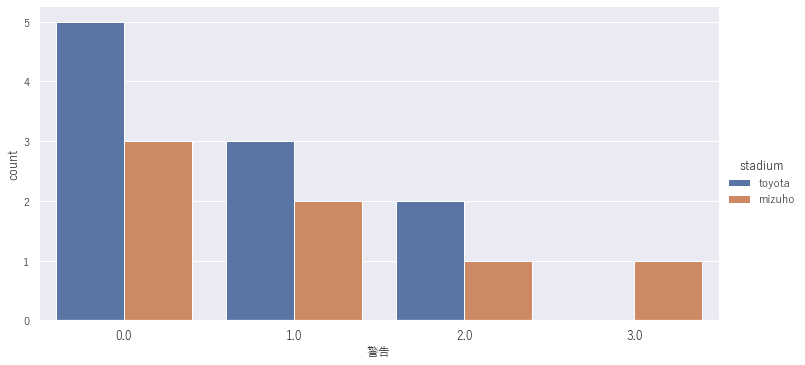

In [50]:
sns.catplot(x="警告", kind="count",  hue="stadium",data=df,aspect=2)
plt.xticks(fontsize=12)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '8.0'),
  Text(1, 0, '9.0'),
  Text(2, 0, '11.0'),
  Text(3, 0, '12.0'),
  Text(4, 0, '13.0'),
  Text(5, 0, '14.0'),
  Text(6, 0, '16.0'),
  Text(7, 0, '17.0'),
  Text(8, 0, '18.0'),
  Text(9, 0, '20.0'),
  Text(10, 0, '22.0')])

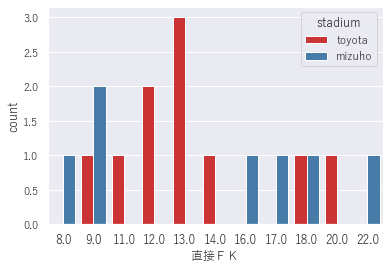

In [51]:
sns.countplot(x="直接ＦＫ", hue="stadium", palette="Set1", data=df)
plt.xticks(fontsize=12)

<AxesSubplot:xlabel='直接ＦＫ', ylabel='Count'>

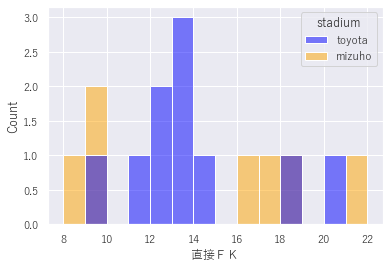

In [52]:
sns.histplot(x="直接ＦＫ", data=df, hue="stadium", binwidth=1, palette={"toyota":"blue", "mizuho":"Orange"})

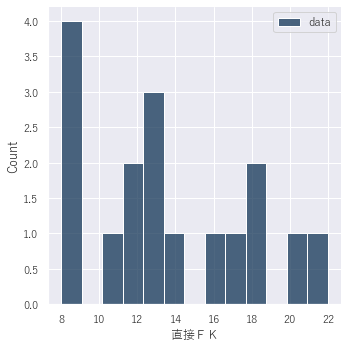

In [53]:
sns.displot(
    df['直接ＦＫ'], bins=13, color='#123456', label='data',
    kde=False,
    rug=False
)
plt.legend() # 凡例を表示
plt.show()   # ヒストグラムを表示

In [57]:
import math

In [58]:
# スタージェスの公式で適切なbinsの値を求める
sturges = lambda n: math.ceil(math.log2(n*2))

sturges(len(df['直接ＦＫ']))


6

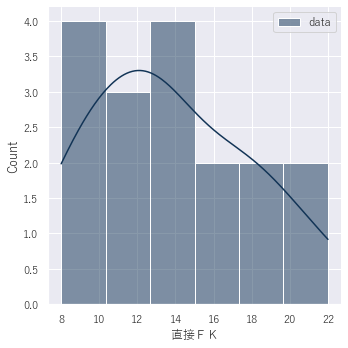

In [59]:
sns.displot(
    df['直接ＦＫ'], bins=6, color='#123456', label='data',
    kde=True
)
plt.legend()
plt.show()

In [85]:
df.stadium

toyota_game:1     toyota
toyota_game:2     toyota
toyota_game:3     toyota
toyota_game:4     toyota
toyota_game:5     toyota
toyota_game:6     toyota
toyota_game:7     toyota
toyota_game:8     toyota
toyota_game:9     toyota
toyota_game:10    toyota
mizuho_game:1     mizuho
mizuho_game:2     mizuho
mizuho_game:3     mizuho
mizuho_game:4     mizuho
mizuho_game:5     mizuho
mizuho_game:6     mizuho
mizuho_game:7     mizuho
Name: stadium, dtype: object

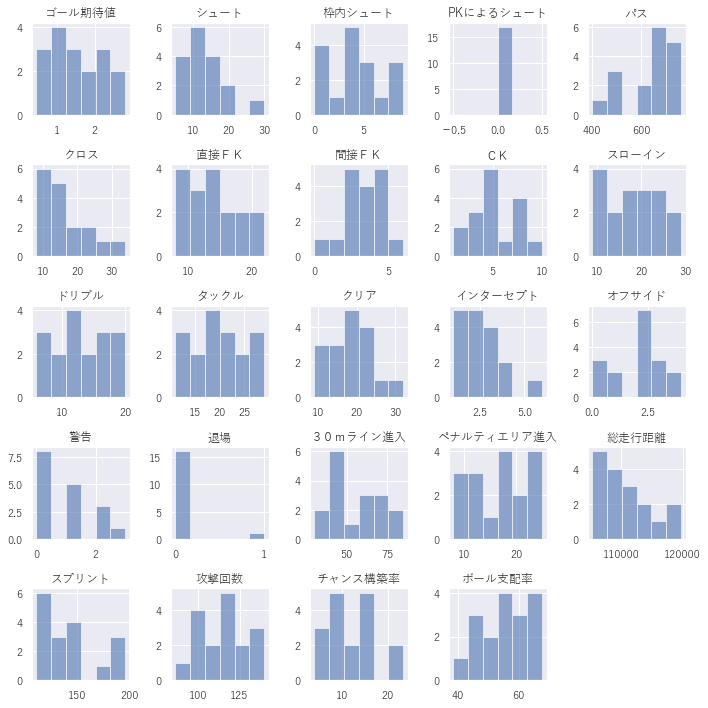

In [106]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10 # グラフのサイズを大きくする
df.hist(bins=6, alpha=0.6)
plt.tight_layout() # グラフ同士が重ならないようにする
plt.show()

In [99]:
x1 = df[df.stadium =='toyota']
x2 = df[df.stadium =='mizuho']

TypeError: hist() got multiple values for argument 'x'

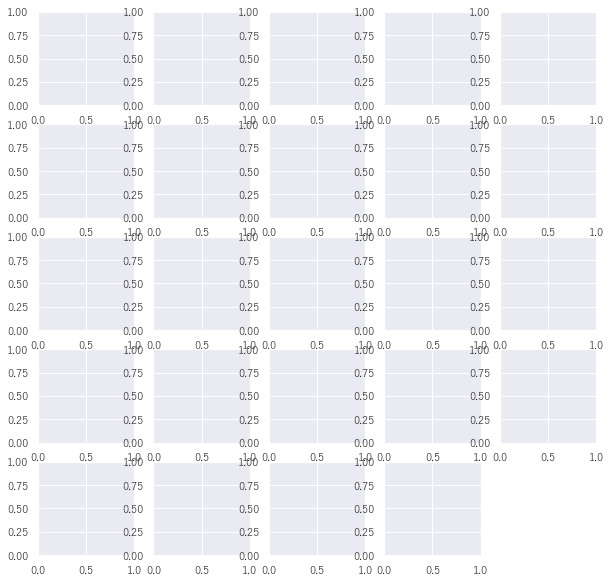

In [125]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10 # グラフのサイズを大きくする
df.hist(x=[x1,x2],bins=6, alpha=0.6) 
plt.tight_layout() # グラフ同士が重ならないようにする
plt.show()

C:\Users\NatsukaHashizume\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\NatsukaHashizume\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\NatsukaHashizume\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


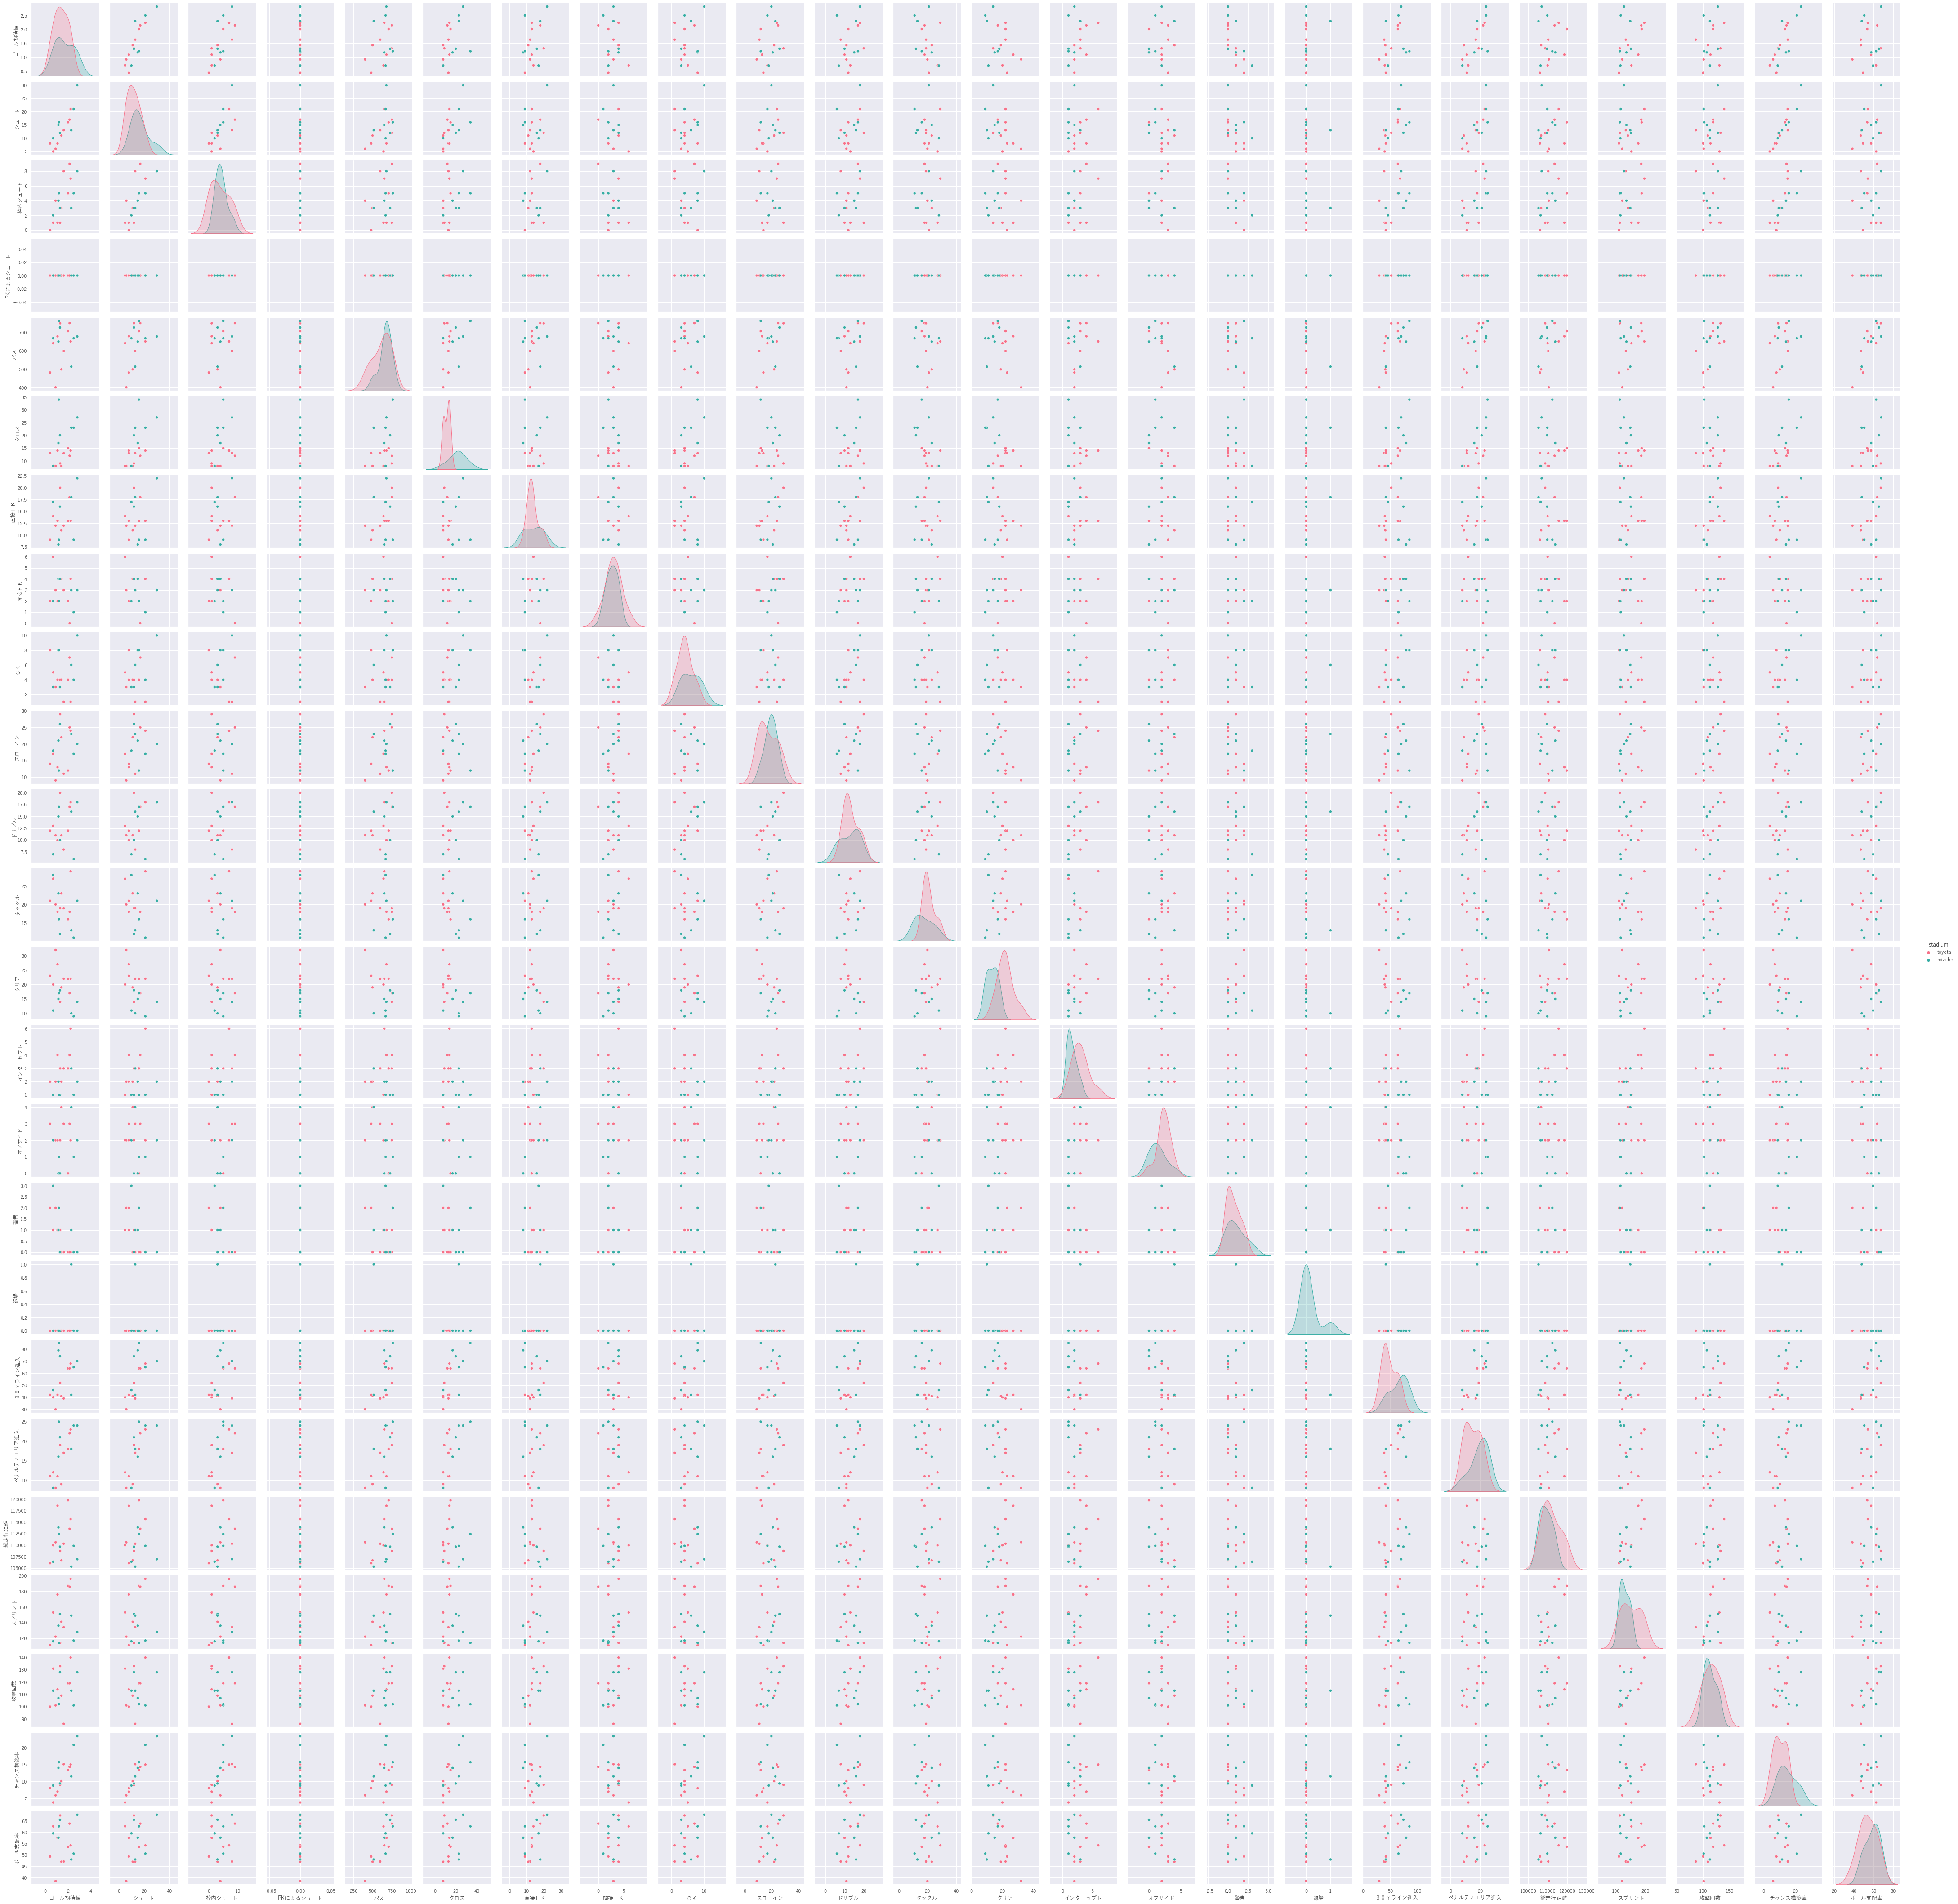

In [112]:
sns.pairplot(df, hue='stadium', palette="husl")

In [119]:
df.iloc[:,1]

toyota_game:1     21.0
toyota_game:2      5.0
toyota_game:3     16.0
toyota_game:4     17.0
toyota_game:5     12.0
toyota_game:6     13.0
toyota_game:7     11.0
toyota_game:8      6.0
toyota_game:9      8.0
toyota_game:10     8.0
mizuho_game:1     15.0
mizuho_game:2     12.0
mizuho_game:3     30.0
mizuho_game:4     13.0
mizuho_game:5     10.0
mizuho_game:6     21.0
mizuho_game:7     16.0
Name: シュート, dtype: float64

In [124]:
sns.displot(df.iloc[:,1], bins=5, hue="stadium",  kde=True)
sns.displot(df.iloc[:,2], bins=5,  kde=True)
sns.displot(df.iloc[:,3], bins=5,  kde=True)
sns.displot(df.iloc[:,4], bins=5,  kde=True)
sns.displot(df.iloc[:,5], bins=5,  kde=True)
sns.displot(df.iloc[:,6], bins=5,  kde=True)
sns.displot(df.iloc[:,7], bins=5,  kde=True)
plt.legend()

ValueError: The following variable cannot be assigned with wide-form data: `hue`

AttributeError: 'Rectangle' object has no property 'norm_hist'

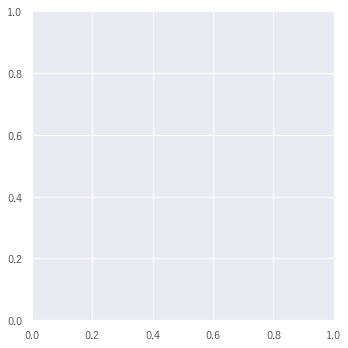

In [130]:
sns.distplot(df["直接ＦＫ"], bins=5, norm_hist=True, kde=True, label='直接ＦＫ', hue)
# sns.distplot(df["Accounting"], bins=5, norm_hist=True, kde=True, label='Accounting')

In [140]:
# 最小値
x_min = int(df["直接ＦＫ"].min())

# 最大値
x_max = int(df["直接ＦＫ"].max())

# 最小値から最大値の範囲で5間隔
range_bin_width = range(x_min, x_max, 5)

In [143]:
range_bin_width

range(8, 22, 5)

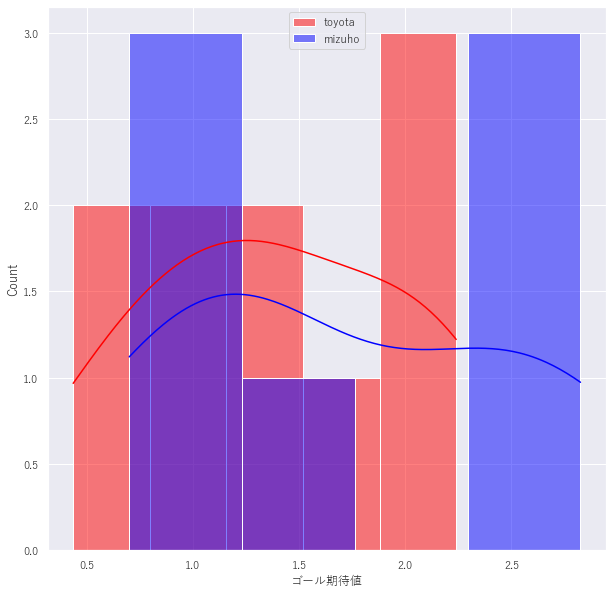

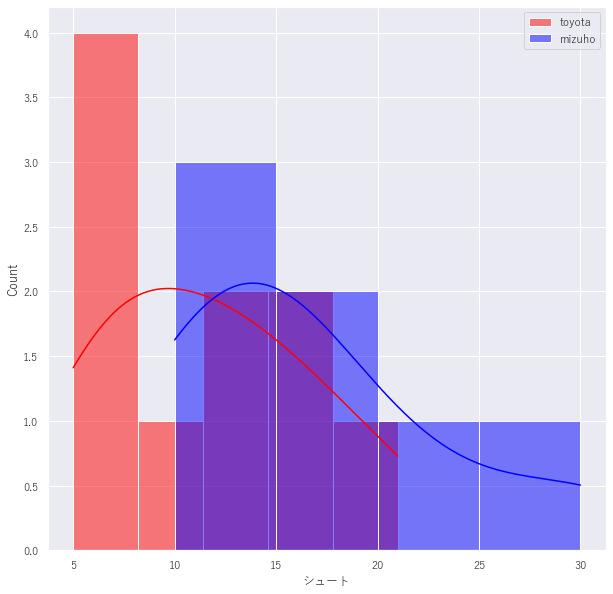

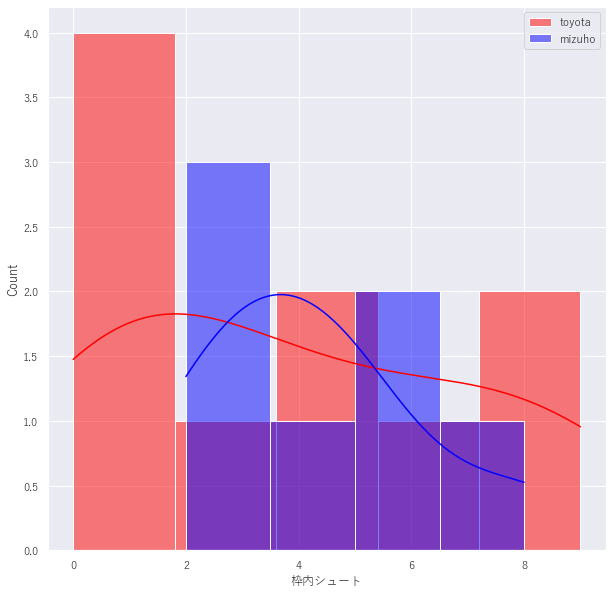

C:\Users\NatsukaHashizume\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\NatsukaHashizume\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


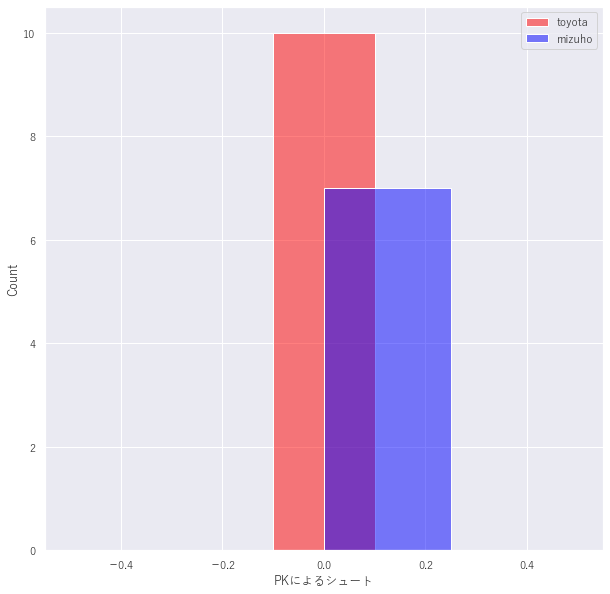

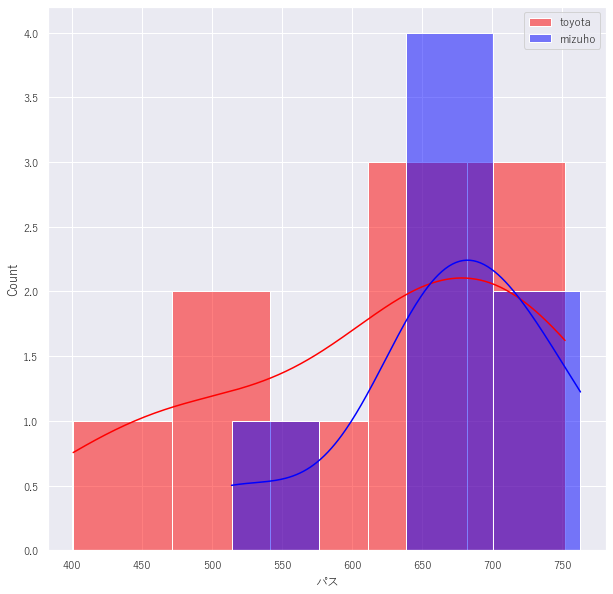

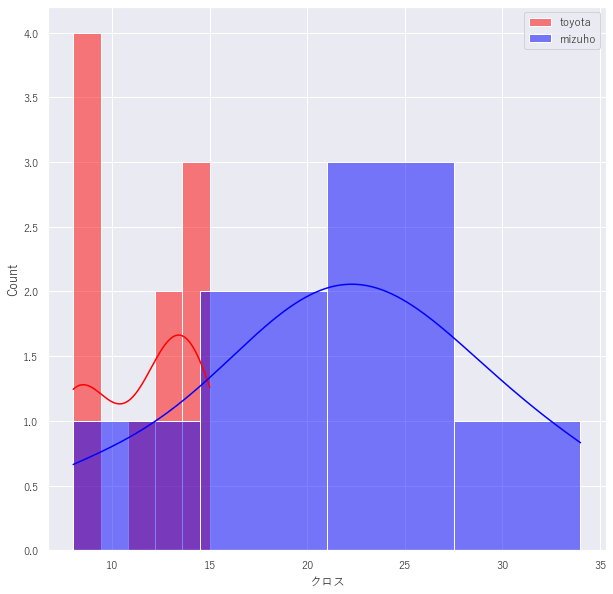

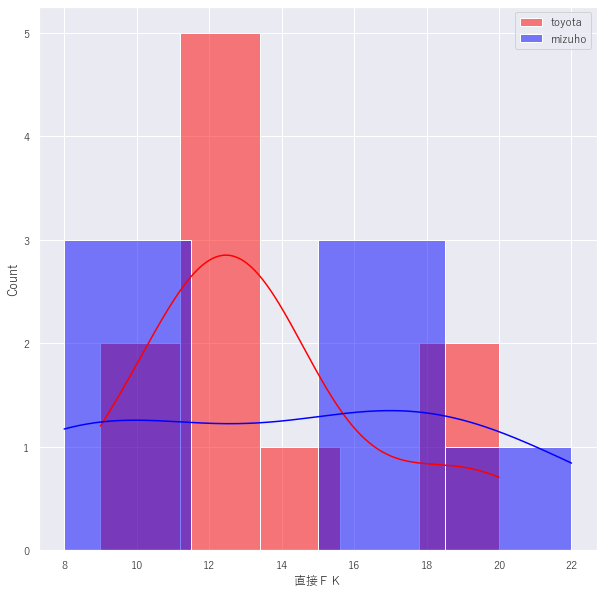

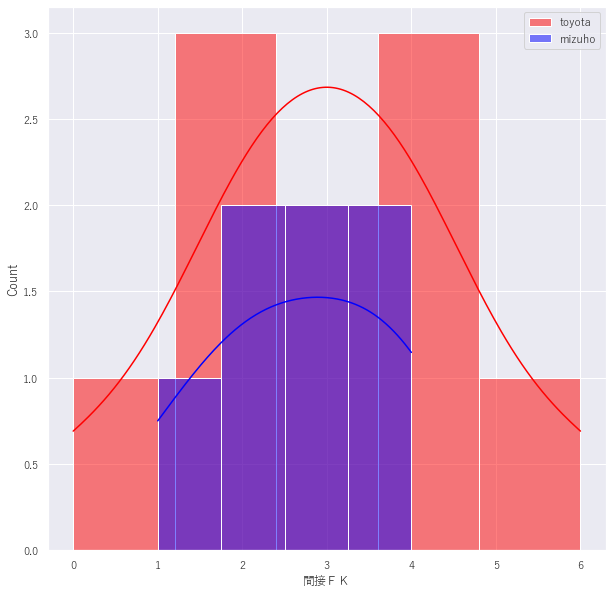

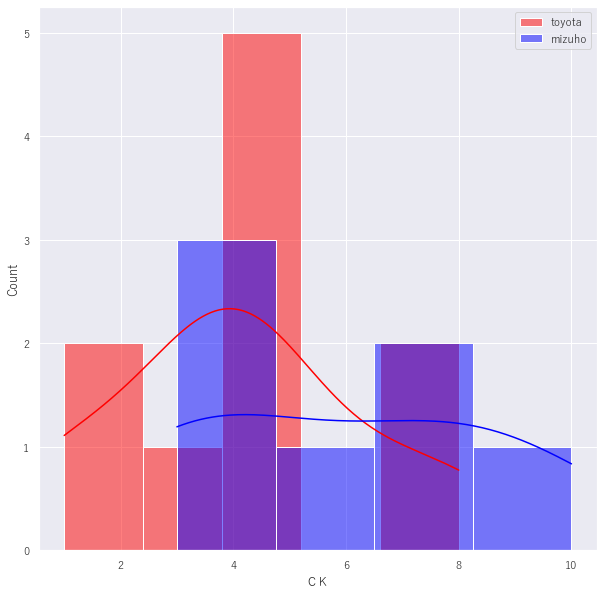

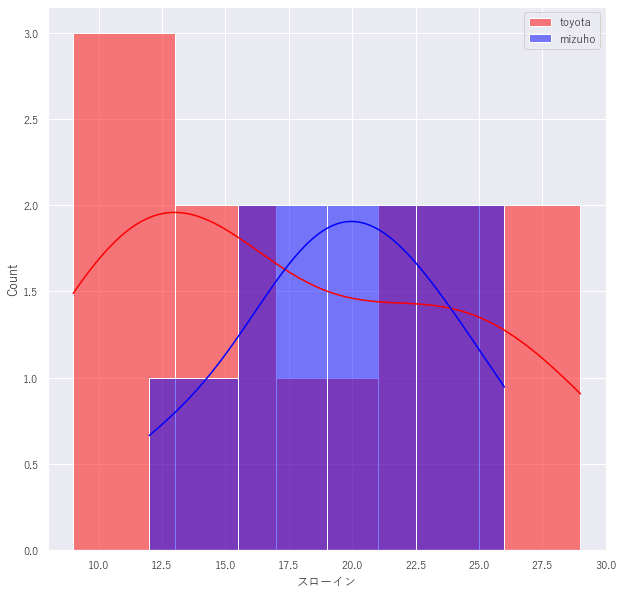

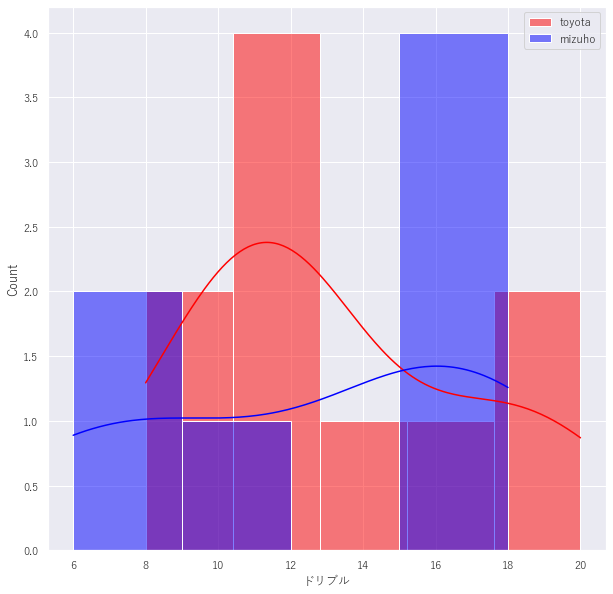

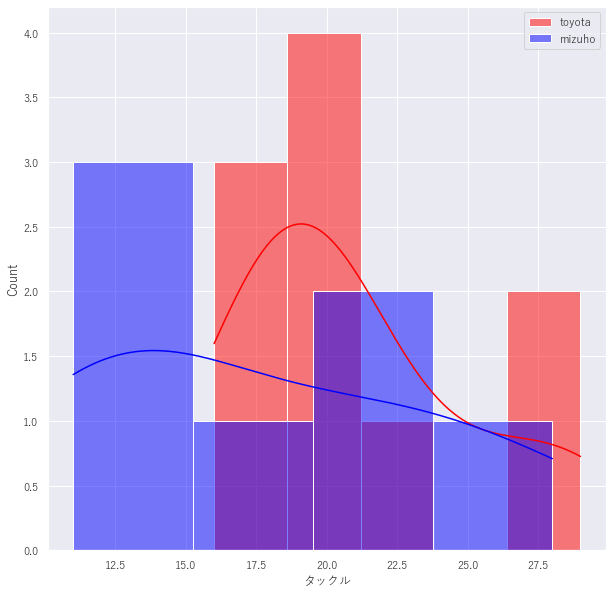

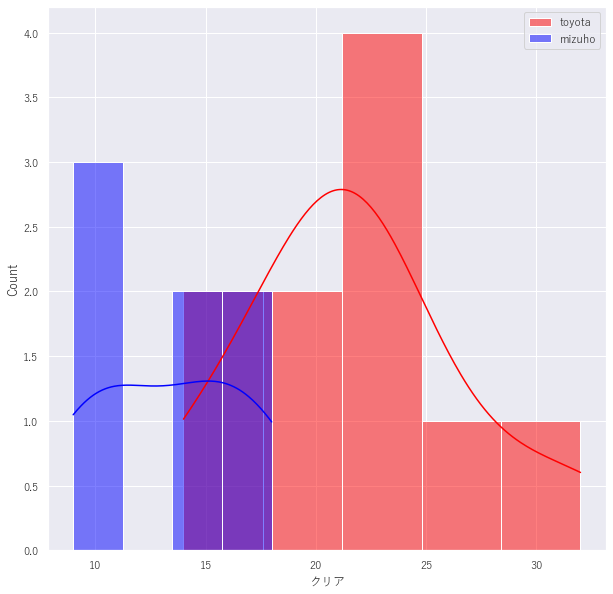

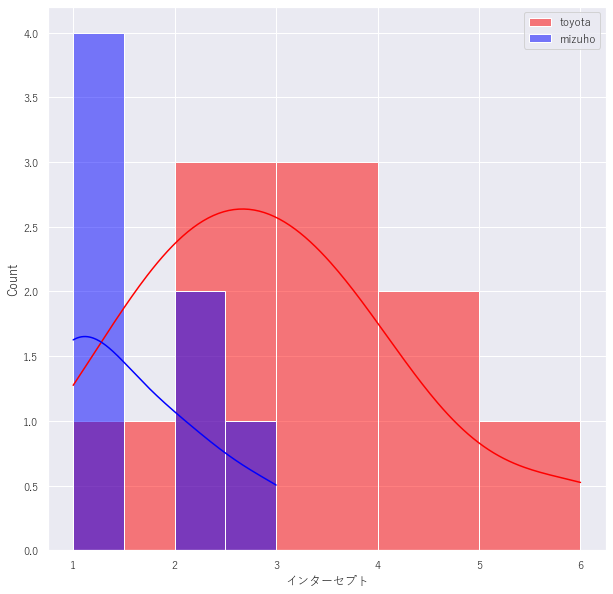

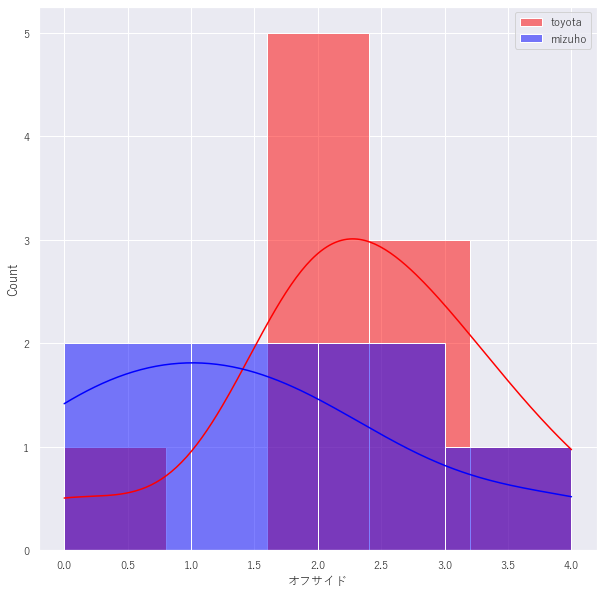

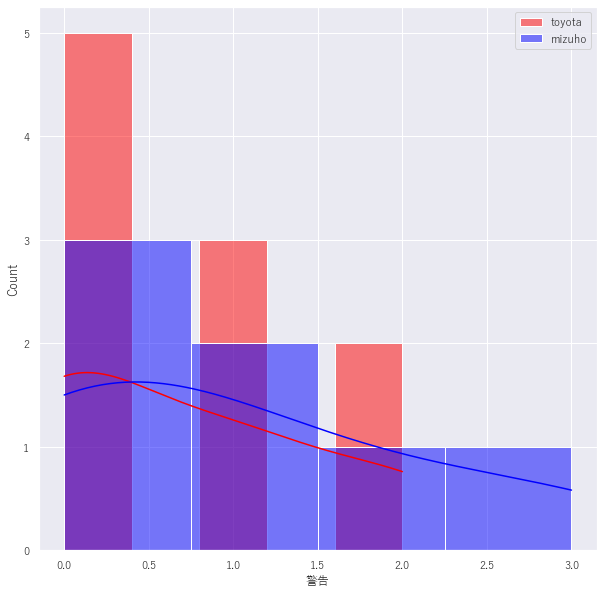

C:\Users\NatsukaHashizume\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


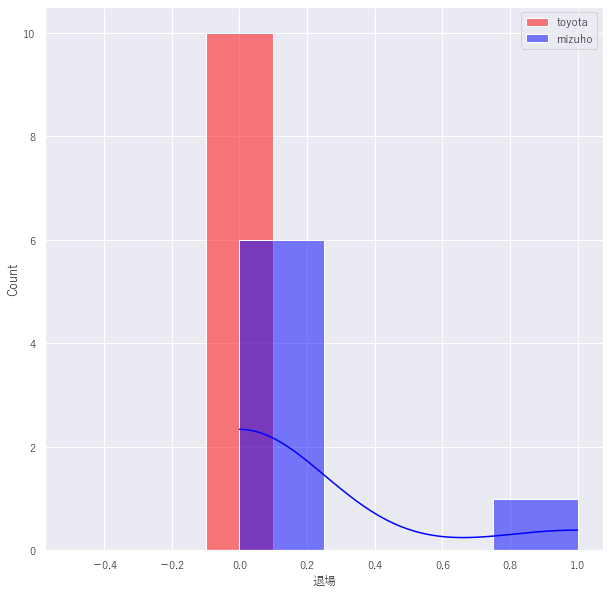

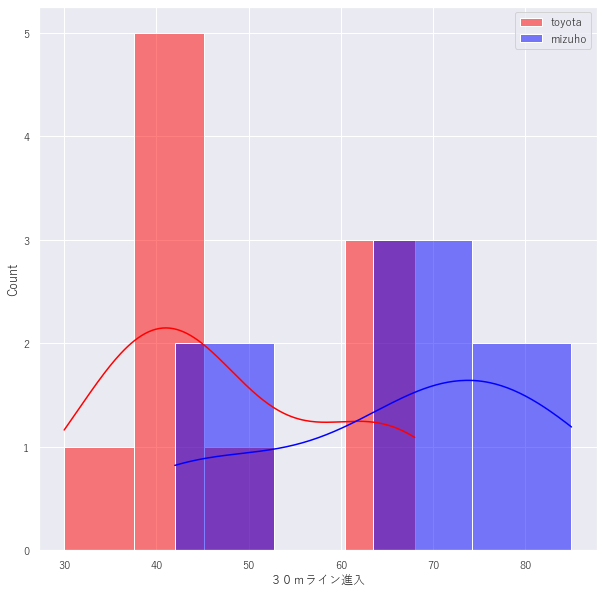

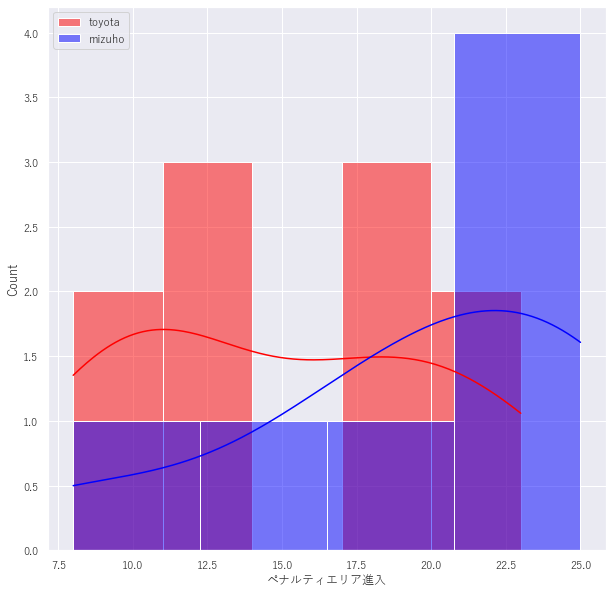

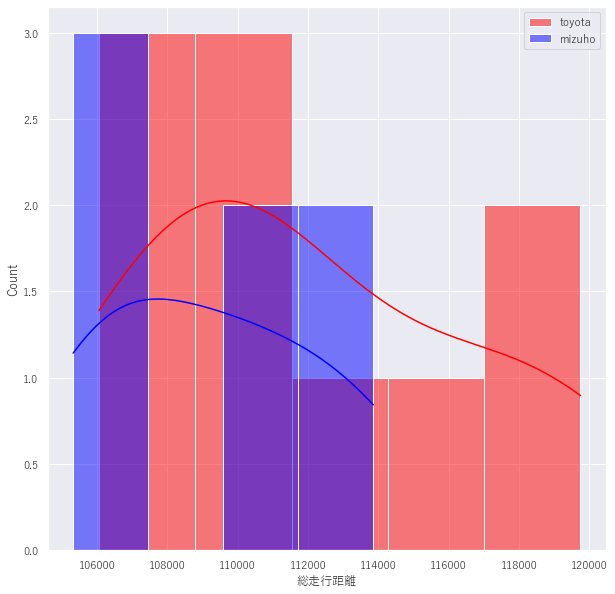

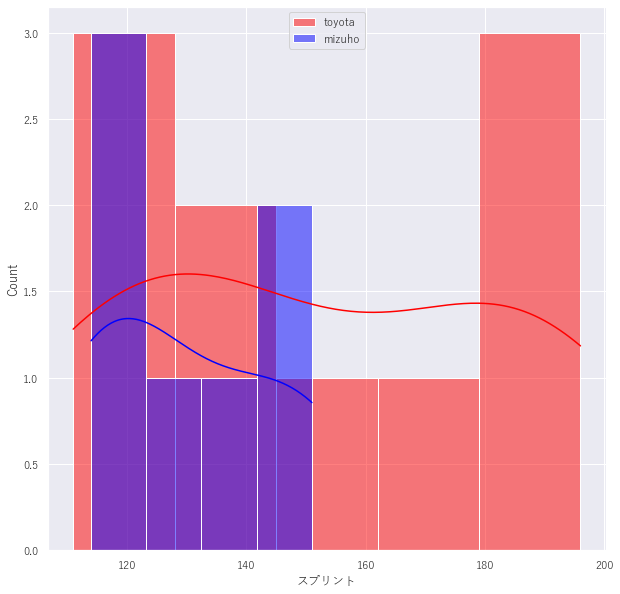

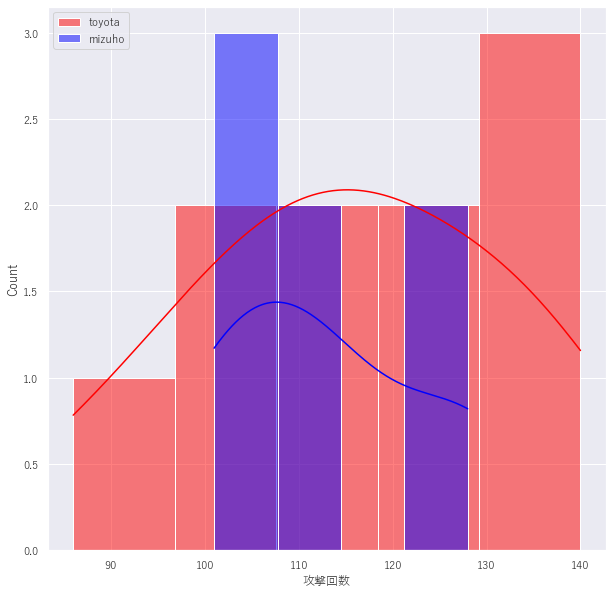

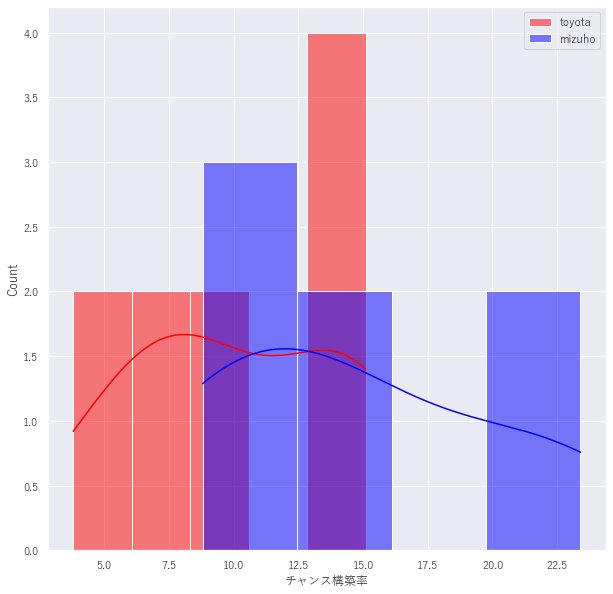

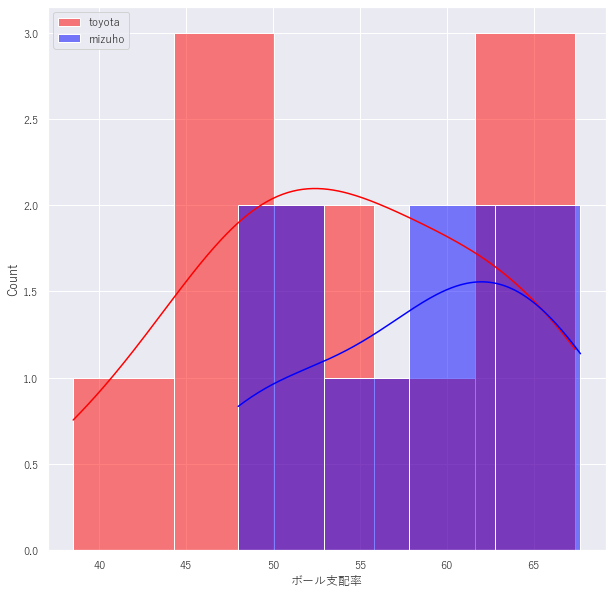

C:\Users\NatsukaHashizume\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\NatsukaHashizume\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


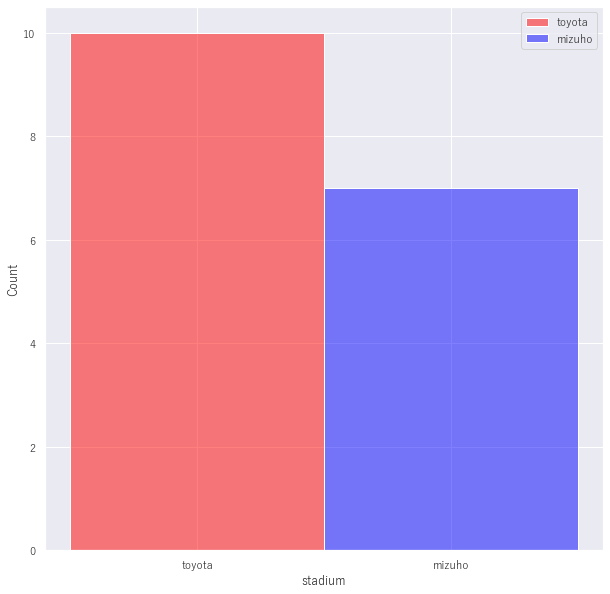

In [147]:
for i in df.columns:
    # # 最小値
    # x_min = int(df[i].min())
    # # 最大値
    # x_max = int(df[i].max())
    # # 最小値から最大値の範囲で5間隔
    # range_bin_width = range(x_min, x_max, 5)    

    stadium_arr = df['stadium'].unique()
    color_dict = {0:'red', 1:'blue', 2:'green'}

    for index, item in enumerate(stadium_arr):
        data = df.query('stadium=="'+item+'"')[i]
        sns.distplot( #histplotでも可
            data,
            bins=sturges(len(data)),
            color=color_dict[index],
            kde=True,
            label=item
        )
        
    plt.legend()
    plt.show()

In [154]:
df.groupby("stadium").describe()

スタッツ    ゴール期待値                                                             \
         count      mean       std    min     25%     50%      75%    max   
stadium                                                                     
mizuho     7.0  1.717286  0.810730  0.701  1.1925  1.3040  2.40300  2.825   
toyota    10.0  1.394200  0.618331  0.437  0.9620  1.3745  1.92025  2.240   

スタッツ     シュート             ... チャンス構築率       ボール支配率                             \
        count       mean  ...     75%   max  count       mean       std   min   
stadium                   ...                                                   
mizuho    7.0  16.714286  ...  18.250  23.4    7.0  58.785714  7.352421  48.0   
toyota   10.0  11.700000  ...  14.075  15.1   10.0  54.100000  8.949612  38.5   

スタッツ                                
           25%   50%     75%   max  
stadium                             
mizuho   54.10  59.5  64.050  67.7  
toyota   47.65  53.9  61.325  67.4  

[2 rows x 192 columns]

In [205]:
df_group=df.groupby("stadium").sum()


スタッツ,ゴール期待値,シュート,枠内シュート,PKによるシュート,パス,クロス,直接ＦＫ,間接ＦＫ,ＣＫ,スローイン,...,オフサイド,警告,退場,３０ｍライン進入,ペナルティエリア進入,総走行距離,スプリント,攻撃回数,チャンス構築率,ボール支配率
stadium,,,,,,,,,,,,,,,,,,,,,
mizuho,12.021,117.0,30.0,0.0,4673.0,152.0,99.0,19.0,42.0,137.0,...,10.0,7.0,1.0,461.0,136.0,764418.0,911.0,792.0,103.6,411.5
toyota,13.942,117.0,39.0,0.0,6166.0,114.0,135.0,30.0,41.0,176.0,...,23.0,7.0,0.0,482.0,150.0,1119858.0,1520.0,1152.0,101.6,541.0


In [243]:
#atで値だけを取り出せる
fk_mizuho = df_group.at['mizuho','直接ＦＫ']+df_group.at['mizuho','間接ＦＫ']
fk_toyota = df_group.at['toyota','直接ＦＫ']+df_group.at['toyota','間接ＦＫ']

yellow_mizuho = df_group.at['mizuho','警告']
yellow_toyota = df_group.at['toyota','警告']

game_mizuho=(df["stadium"]=='mizuho').sum()
game_toyota=(df["stadium"]=='toyota').sum()

In [263]:
fk_count=(fk_mizuho/game_mizuho)-(fk_toyota/game_toyota)
fk_advantage=(fk_toyota)/(fk_mizuho)*100
print("FKが1試合当たり {:.2f}回となり、\nホームアドバンテージが {:.2f}%となる。".format(fk_count,fk_advantage))

FKが1試合当たり 0.36回となり、
ホームアドバンテージが 139.83%となる。


In [262]:
yellow_count=(yellow_toyota/game_toyota)-(yellow_mizuho/game_mizuho)
yellow_advantage=(yellow_toyota)/(yellow_mizuho)*100
print("FKが1試合当たり {:.2f}回となり、\nホームアドバンテージが {:.2f}%となる。".format(yellow_count,yellow_advantage))

FKが1試合当たり -0.30回となり、
ホームアドバンテージが 100.00%となる。


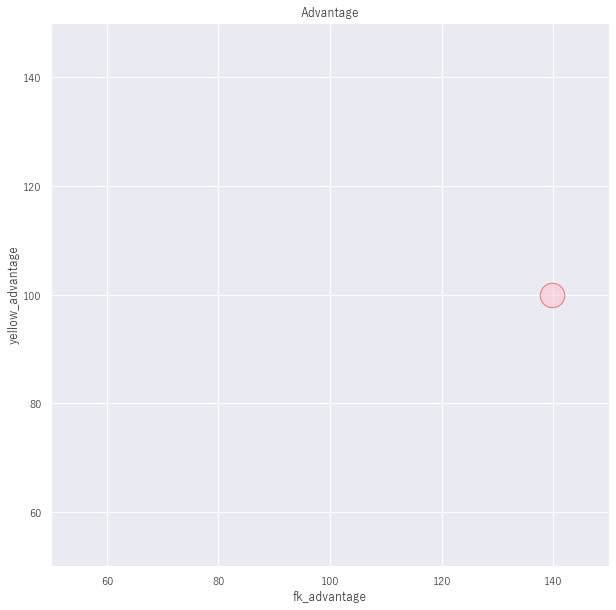

In [274]:
plt.title("Advantage")
plt.xlabel("fk_advantage")
plt.ylabel("yellow_advantage")
plt.grid(True)
plt.xlim([50,150]) 
plt.ylim([50,150]) 
plt.scatter(x=fk_advantage, y=yellow_advantage, s=600, c="pink", alpha=0.5, edgecolors="red")